In [20]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

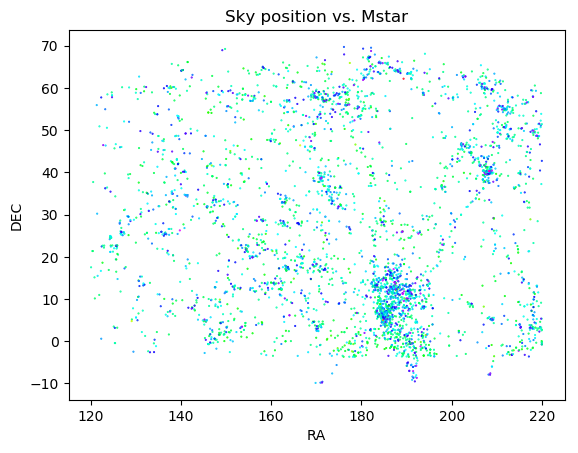

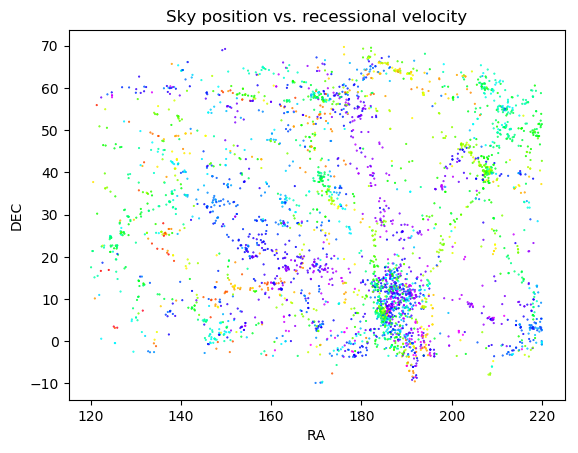

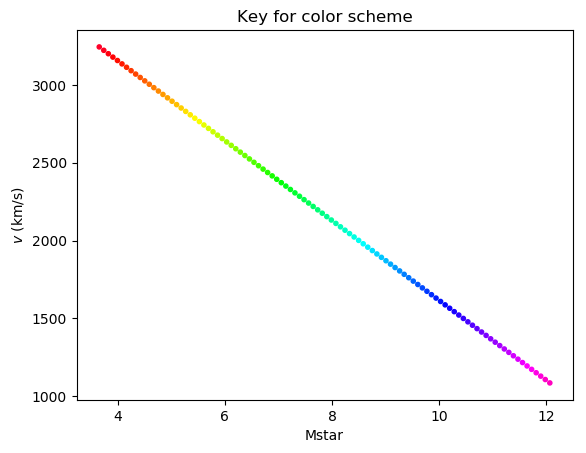

In [94]:
with fits.open("../Virgo/tables/nsa_mstar.virgo.fits") as tab:
    data = tab[1].data
    cols = tab[1].columns

rvel = ((data["Z"]+1)**2-1)/((data["Z"]+1)**2+1)*3e5 #Recessional velocity in km/s, converted from redshift


#Colors in order of increasing Mstar/decreasing recessional velocity:
#  red --> orange --> yellow --> green --> aqua --> blue --> purple
plt.figure(1)
plt.scatter(data["RA"], data["DEC"], c=data["MSTAR"], marker=".", s=1, cmap="gist_rainbow")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Sky position vs. Mstar")

plt.figure(2)
plt.scatter(data["RA"], data["DEC"], c=-rvel, marker=".", s=1, cmap="gist_rainbow")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Sky position vs. recessional velocity")

plt.figure(3)
plt.scatter(np.linspace(min(data["MSTAR"]), max(data["MSTAR"]), 100),
            np.linspace(max(rvel), min(rvel), 100),
            c=np.linspace(min(data["MSTAR"]), max(data["MSTAR"]), 100),
            marker=".", cmap="gist_rainbow")
plt.xlabel("Mstar")
plt.ylabel("$v$ (km/s)")
plt.title("Key for color scheme")
pass

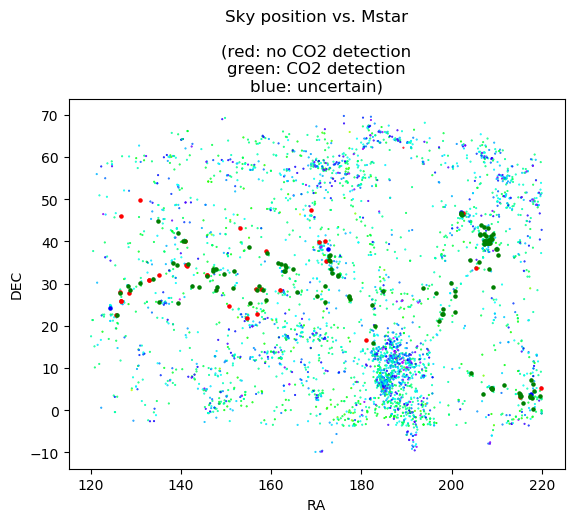

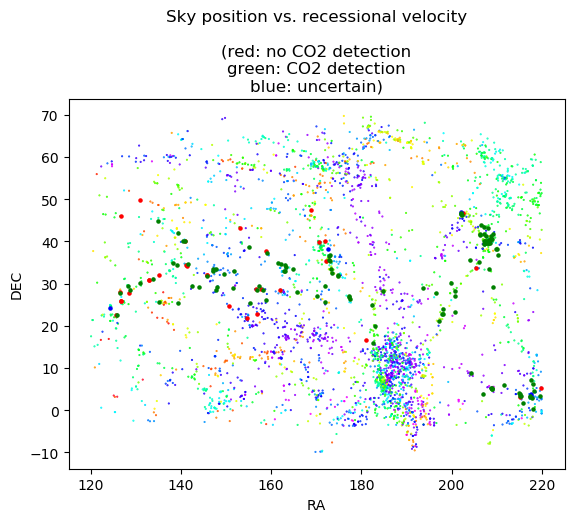

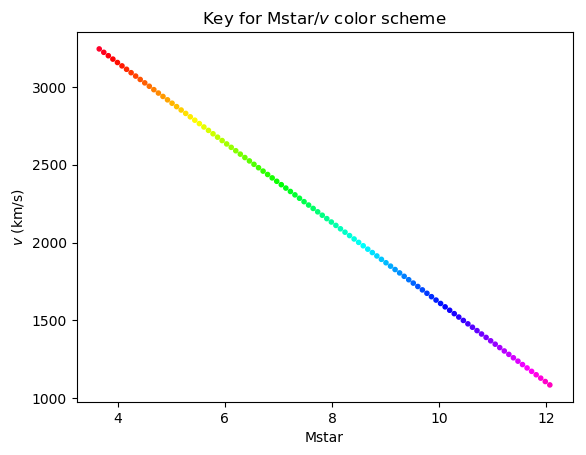

In [105]:
with fits.open("../Virgo/tables/nsa_CO-Gianluca.virgo.fits") as tab:
    data2 = tab[1].data
    cols2 = tab[1].columns

#int(n[0])*len(n) gives 2 for n == "1?" and int(n) for n in {"0", "1", "2"}.
codetected = [int(i[0])*len(i) if len(i) else -1 for i in data2["COdetected"]]
coarrays = [[],[],[]]
for i in range(len(codetected)):
    if codetected[i] >= 0:
        coarrays[codetected[i]].append((data2["RA"][i], data2["DEC"][i]))
coarrays = [np.asarray(list(zip(*i))) for i in coarrays]

plt.figure(1)
plt.scatter(data["RA"], data["DEC"], c=data["MSTAR"], marker=".", s=1, cmap="gist_rainbow")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Sky position vs. Mstar\n\n(red: no CO2 detection\ngreen: CO2 detection\nblue: uncertain)")
plt.scatter(coarrays[0][0], coarrays[0][1], marker="o", s=5, c="red")
plt.scatter(coarrays[2][0], coarrays[2][1], marker="o", s=5, c="blue")
plt.scatter(coarrays[1][0], coarrays[1][1], marker="o", s=5, c="green")

plt.figure(2)
plt.scatter(data["RA"], data["DEC"], c=-rvel, marker=".", s=1, cmap="gist_rainbow")
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Sky position vs. recessional velocity\n\n(red: no CO2 detection\ngreen: CO2 detection\nblue: uncertain)")
plt.scatter(coarrays[0][0], coarrays[0][1], marker="o", s=5, c="red")
plt.scatter(coarrays[2][0], coarrays[2][1], marker="o", s=5, c="blue")
plt.scatter(coarrays[1][0], coarrays[1][1], marker="o", s=5, c="green")

plt.figure(3)
plt.scatter(np.linspace(min(data["MSTAR"]), max(data["MSTAR"]), 100),
            np.linspace(max(rvel), min(rvel), 100),
            c=np.linspace(min(data["MSTAR"]), max(data["MSTAR"]), 100),
            marker=".", cmap="gist_rainbow")
plt.xlabel("Mstar")
plt.ylabel("$v$ (km/s)")
plt.title("Key for Mstar/$v$ color scheme")
pass